# Lineáris algebra

In [1]:
# Random mátrix
A = rand(1:4,3,3)

3×3 Array{Int64,2}:
 3  2  3
 1  4  1
 4  4  2

In [2]:
# Egyesekkel teli vektor
x = fill(1.0, (3)) # vagy `ones(3)`

3-element Array{Float64,1}:
 1.0
 1.0
 1.0

In [3]:
b = A*x # Szorzás

3-element Array{Float64,1}:
  8.0
  6.0
 10.0

In [4]:
# Konjugált transzponált
A'

3×3 Adjoint{Int64,Array{Int64,2}}:
 3  1  4
 2  4  4
 3  1  2

In [5]:
# Transzponált
transpose(A)

3×3 Transpose{Int64,Array{Int64,2}}:
 3  1  4
 2  4  4
 3  1  2

In [6]:
# Lineáris egyenletrendszerek megoldása
A\b

3-element Array{Float64,1}:
 1.0000000000000002
 1.0               
 0.9999999999999998

## Mátrix dekompozíciók

In [7]:
using LinearAlgebra

In [56]:
# Random mátrix
A = rand(3,3)

3×3 Array{Float64,2}:
 0.268823  0.186721  0.321859
 0.450096  0.186799  0.961101
 0.134243  0.964543  0.176886

In [57]:
eigmax(A)

1.2890541723184847

In [58]:
eigen(A)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
3-element Array{Float64,1}:
  1.2890541723184847 
  0.10173046819308784
 -0.7582765663881217 
eigenvectors:
3×3 Array{Float64,2}:
 -0.32913   -0.904794   -0.101461
 -0.69335    0.0935566  -0.685181
 -0.641045   0.415446    0.721272

In [59]:
qr(A)

LinearAlgebra.QRCompactWY{Float64,Array{Float64,2}}
Q factor:
3×3 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.496736  -0.0634131  -0.865582 
 -0.831697  -0.250269    0.495626 
 -0.248058   0.966097    0.0715773
R factor:
3×3 Array{Float64,2}:
 -0.541178  -0.487374  -1.0031   
  0.0        0.873252  -0.0900548
  0.0        0.0        0.210412 

In [60]:
lu(A)

LU{Float64,Array{Float64,2}}
L factor:
3×3 Array{Float64,2}:
 1.0       0.0        0.0
 0.298255  1.0        0.0
 0.597256  0.0826928  1.0
U factor:
3×3 Array{Float64,2}:
 0.450096  0.186799   0.961101
 0.0       0.908829  -0.109767
 0.0       0.0       -0.243087

## Speciális Mátrix struktúrák

In [13]:
using LinearAlgebra

In [14]:
n = 1000
A = randn(n,n);

In [15]:
# Szimmetria ellenőrzése
Asym = A + A'
issymmetric(Asym)

true

In [16]:
# Numerikus zajjal terhelt mátrix
Asym_noisy = copy(Asym)
Asym_noisy[1,2] += 5eps()
issymmetric(Asym_noisy)

false

In [17]:
# Szimmetrikus mátrixok direkt definiálása
Asym_explicit = Symmetric(Asym_noisy);

In [18]:
@time eigvals(Asym);
@time eigvals(Asym_noisy);
@time eigvals(Asym_explicit);

  0.090288 seconds (18.99 k allocations: 8.979 MiB)
  0.862438 seconds (18 allocations: 7.921 MiB)
  0.197209 seconds (7.60 k allocations: 8.378 MiB)


### Nagy elemszámú problémák

In [19]:
n = 1_000_000;
A = SymTridiagonal(randn(n), randn(n-1));
@time eigmax(A)

  0.873977 seconds (519.48 k allocations: 208.403 MiB, 8.45% gc time)


6.334477063028135

In [20]:
A

1000000×1000000 SymTridiagonal{Float64,Array{Float64,1}}:
  0.693507  -0.511006     ⋅          ⋅       …   ⋅          ⋅        ⋅       
 -0.511006  -0.0556827   0.342219    ⋅           ⋅          ⋅        ⋅       
   ⋅         0.342219    0.78431   -1.09116      ⋅          ⋅        ⋅       
   ⋅          ⋅         -1.09116   -0.62924      ⋅          ⋅        ⋅       
   ⋅          ⋅           ⋅         1.52308      ⋅          ⋅        ⋅       
   ⋅          ⋅           ⋅          ⋅       …   ⋅          ⋅        ⋅       
   ⋅          ⋅           ⋅          ⋅           ⋅          ⋅        ⋅       
   ⋅          ⋅           ⋅          ⋅           ⋅          ⋅        ⋅       
   ⋅          ⋅           ⋅          ⋅           ⋅          ⋅        ⋅       
   ⋅          ⋅           ⋅          ⋅           ⋅          ⋅        ⋅       
   ⋅          ⋅           ⋅          ⋅       …   ⋅          ⋅        ⋅       
   ⋅          ⋅           ⋅          ⋅           ⋅          ⋅        ⋅       
   ⋅  

# Differenciálegyenletek numerikus megoldása

[Differentialequations.jl](http://docs.juliadiffeq.org/latest/) - Beállítások, és részletek a megoldókról általában

In [21]:
using DifferentialEquations
using Plots

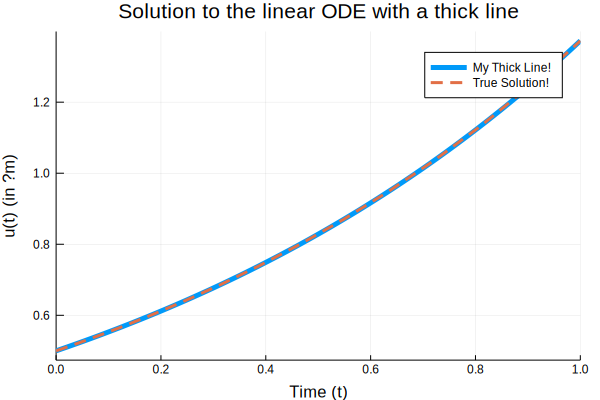

In [22]:

# Probléma definiálása (itt most Közönséges DE kezdeti érték problémája)
f(u,p,t) = 1.01*u
u0=1/2
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)

# Megoldása
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)


# Ábrázolása
plot(sol,linewidth=5,title="Solution to the linear ODE with a thick line",
     xaxis="Time (t)",yaxis="u(t) (in μm)",label="My Thick Line!") # legend=false
plot!(sol.t, t->0.5*exp(1.01t),lw=3,ls=:dash,label="True Solution!")

Lorentz egyenletek

\begin{align}
\frac{dx}{dt} &= σ(y-x) \\
\frac{dy}{dt} &= x(ρ-z) - y \\
\frac{dz}{dt} &= xy - βz \\
\end{align}

In [23]:
u0 = [1.0,0.0,0.0]
tspan = (0.0,1.0)
p = [10.0,28.0,8/3]
prob = ODEProblem(parameterized_lorenz,u0,tspan,p)

UndefVarError: UndefVarError: parameterized_lorenz not defined

In [24]:
function lorenz(du,u,p,t)
 du[1] = p[1]*(u[2]-u[1])
 du[2] = u[1]*(p[2]-u[3]) - u[2]
 du[3] = u[1]*u[2] - (p[3])*u[3]
end

lorenz (generic function with 1 method)

In [25]:
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
p=(15.,28.,8. /3.)
prob = ODEProblem(lorenz,u0,tspan,p)
@time sol = solve(prob);

  6.783799 seconds (17.47 M allocations: 899.842 MiB, 9.03% gc time)


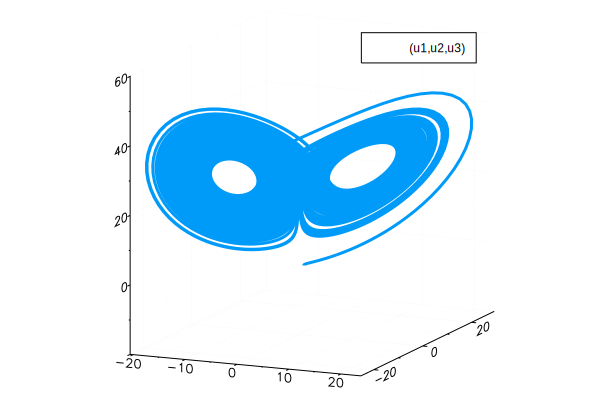

In [26]:
plot(sol,vars=(1,2,3))

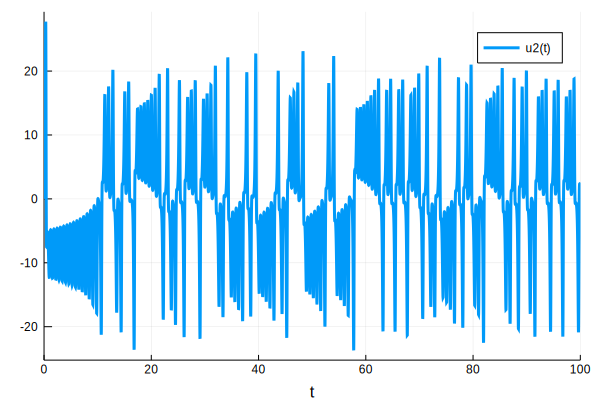

In [27]:
plot(sol,vars=(0,2))

# Nemlineáris egyenletek megoldása

### Általánosabb nemlineáris megoldó

[(NLsolve.jl)](https://github.com/JuliaNLSolvers/NLsolve.jl)

In [28]:
using NLsolve

In [29]:
# Probléma
function f!(F, x)
    F[1] = (x[1]+3)*(x[2]^3-7)+18
    F[2] = sin(x[2]*exp(x[1])-1)
end

# Probléma Jacobi mátrixa
function j!(J, x)
    J[1, 1] = x[2]^3-7
    J[1, 2] = 3*x[2]^2*(x[1]+3)
    u = exp(x[1])*cos(x[2]*exp(x[1])-1)
    J[2, 1] = x[2]*u
    J[2, 2] = u
end
# Kezdeti megoldásvektor
init=[ 0.1; 1.2];
solu=nlsolve(f!, j!, init)

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.1, 1.2]
 * Zero: [-3.7818e-16, 1.0]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

### Intervallum aritmetika segítségével

[(IntervalRootFinding.jl)](https://github.com/JuliaIntervals/IntervalRootFinding.jl)

In [53]:
using IntervalArithmetic, IntervalRootFinding
using StaticArrays

In [54]:
g(x) = (x^2-2)^2 * (x^2 - 3)
rts=roots(g, -10..10)

4-element Array{Root{Interval{Float64}},1}:
 Root([1.73205, 1.73206], :unique)   
 Root([1.41421, 1.41422], :unknown)  
 Root([-1.41422, -1.41421], :unknown)
 Root([-1.73206, -1.73205], :unique) 

In [55]:
function g(x)
   (x1, x2) = x
   SVector((x1+3)*(x2^3-7)+18,
            sin(x2*exp(x1)-1))
end
interval=-2..2
@time rts = roots(g, interval × interval) # × = \times

  2.027744 seconds (4.80 M allocations: 224.263 MiB, 7.49% gc time)


4-element Array{Root{IntervalBox{2,Float64}},1}:
 Root([1.94053, 1.94054] × [1.49727, 1.49728], :unique)          
 Root([1.60901, 1.60902] × [1.45725, 1.45726], :unique)          
 Root([1.10116, 1.10117] × [1.377, 1.37701], :unique)            
 Root([-2.00126e-16, 4.06797e-16] × [0.999999, 1.00001], :unique)

### Felezőmódszer (Multi Dimensional Bisection Method)

https://github.com/bachrathyd/MDBM.jl

Megjegyzés: Ez a módszer inkább ponthalmazok megtalálására alkalmas, pl stabilitási határok

In [33]:
using MDBM

In [34]:
function foo(x1,x2)
   SVector((x1+3)*(x2^3-7)+18,
            sin(x2*exp(x1)-1))
end

ax1=Axis(-2.0:0.1:2.0) # initial grid in x1 direction
ax2=Axis(-2.0:0.1:2.0) # initial grid in x2 direction

mymdbm=MDBM_Problem(foo,[ax1,ax2])
iteration=3 #number of refinements (resolution doubling)
MDBM.solve!(mymdbm,iteration)

getinterpolatedsolution(mymdbm)

2-element Array{Array{Float64,1},1}:
 [1.5842e-5, -1.56338e-5, -1.56143e-5, 1.53927e-5, 1.1012, 1.10117, 1.10113, 1.10118, 1.60902, 1.60905, 1.94062, 1.94049, 1.94053, 1.9405]
 [1.00002, 0.999977, 0.999976, 1.00002, 1.37705, 1.37698, 1.37701, 1.377, 1.45723, 1.45723, 1.49728, 1.49729, 1.49726, 1.49731]           

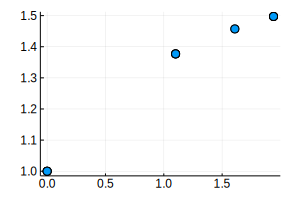

In [35]:
scatter(getinterpolatedsolution(mymdbm)...,size=(300,200),label="")

# Késleltetett egyenletek stabilitásvizsgálata

https://github.com/HTSykora/SemiDiscretizationMethod.jl

In [36]:
using SemiDiscretizationMethod
using MDBM
using Plots
using LaTeXStrings

### Késleltetett Mathieu egyenlet

$$\ddot{x}(t) + a_1 \,\dot{x}(t)+(\delta + \varepsilon \cos(t))x(t)= b_0 \,x(t-2\pi) + \sin(2t)$$
Elsőrendű formára átírva: <br>
$$\dot{\mathbf{x}}(t) = \mathbf{A}(t) \mathbf{x}(t) + \sum_{j=1}^g \mathbf{B}(t) \mathbf{x}(t-\tau_j(t))+\mathbf{c}(t)$$
<br>
$$ \mathbf{x}(t) = \begin{bmatrix}x(t) \\ \dot{x}(t)\end{bmatrix}, \quad
\mathbf{A}(t) = \begin{bmatrix} 0 & 1 \\ -\delta - \varepsilon \cos(t) & -a_1 \end{bmatrix},
\quad \mathbf{B}_1(t) = \begin{bmatrix}0 & 0 \\ b_0 & 0\end{bmatrix},
\quad \tau_1(t) \equiv 2\pi, 
\quad \text{and} \quad \mathbf{c}(t) = \begin{bmatrix} 0 \\ \sin(2t) \end{bmatrix}.$$

In [37]:
function createMathieuProblem(δ,ε,b0,a1;T=2π)
    AMx =  ProportionalMX(t->@SMatrix [0. 1.; -δ-ε*cos(2π/T*t) -a1]);
    τ1=2π # if function is needed, the use τ1 = t->foo(t)
    BMx1 = DelayMX(τ1,t->@SMatrix [0. 0.; b0 0.]);
    cVec = Additive(t->@SVector [0.,sin(4π/T*t)])
    LDDEProblem(AMx,[BMx1],cVec)
end;

In [38]:
τmax=2π # the largest τ of the system
P=2π #Principle period of the system (sin(t)=sin(t+P)) 
mathieu_lddep=createMathieuProblem(3.,2.,-0.15,0.1,T=P); # LDDE problem for Hayes equation
method=SemiDiscretization(1,0.01) # 3rd order semi discretization with Δt=0.1
# if P = τmax, then n_steps is automatically calculated
mapping=calculateMapping(mathieu_lddep,method,τmax,
    n_steps=Int((P+100eps(P))÷method.Δt),calculate_additive=true); #The discrete mapping of the system

a1=0.1;
ε=1;
τmax=2π;
T=1π;
method=SemiDiscretization(2,T/40);

foo(δ,b0) = log(spectralRadiusOfMapping(calculateMapping(createMathieuProblem(δ,ε,b0,a1,T=T),method,τmax,
    n_steps=Int((T+100eps(T))÷method.Δt)))); # No additive term calculated

axis=[Axis(-1:0.2:5.,:δ),
    Axis(-2:0.2:1.5,:b0)];

In [51]:
iteration=3;
@time stab_border_points=getinterpolatedsolution(MDBM.solve!(MDBM_Problem(foo,axis),iteration));

 13.424935 seconds (43.76 M allocations: 11.089 GiB, 21.67% gc time)


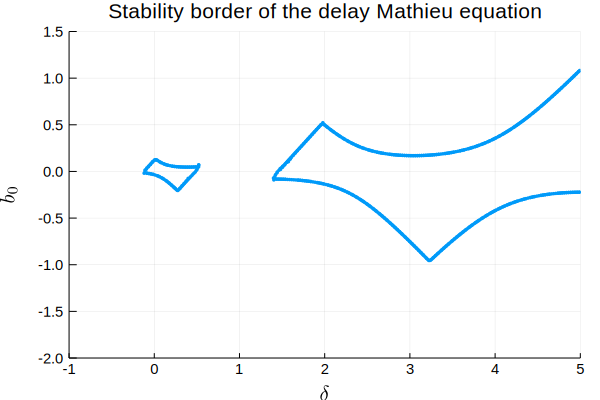

In [52]:
scatter(stab_border_points...,xlim=(-1.,5),ylim=(-2.,1.5),
    label="",title="Stability border of the delay Mathieu equation",xlabel=L"\delta",ylabel=L"b_0",
    guidefontsize=14,tickfont = font(10),markersize=2,markerstrokewidth=0)